In [52]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import linspace, loadtxt, ones, convolve
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import collections
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
# style.use('fivethirtyeight')
%matplotlib inline

In [53]:
df = pd.read_csv('the_data.csv', engine='python')

In [54]:
df.head(10)

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C
5,2018-04-30 05:00:00,0.74,B
6,2018-04-30 06:00:00,-0.77,A
7,2018-04-30 07:00:00,0.98,C
8,2018-04-30 08:00:00,0.18,A
9,2018-04-30 09:00:00,-1.02,A


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null object
x            48 non-null float64
y            48 non-null object
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [56]:
df = df.set_index('timestamp')
df.head(10)

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C
2018-04-30 05:00:00,0.74,B
2018-04-30 06:00:00,-0.77,A
2018-04-30 07:00:00,0.98,C
2018-04-30 08:00:00,0.18,A


## What is the maximum x value for group B? 1.91

In [57]:
df.groupby('y').max()

,x
y,
A,1.84
B,1.91
C,2.06


## What is the average x value for group A? -0.110556

In [58]:
df.groupby('y').mean()

,x
y,
A,-0.110556
B,-0.053846
C,0.232353


## What is the minimum x value for group C? -1.83

In [59]:
df.groupby('y').min()

,x
y,
A,-1.30
B,-2.05
C,-1.83


## Which group has the highest sum of x values? C

In [77]:
df.groupby('y').sum()

,x
y,
A,-1.99
B,-0.70
C,3.95


## All of them together

In [78]:
df.groupby('y').agg(['max', 'mean', 'min', 'sum'])

x                      
    max      mean   min   sum
y                            
A  1.84 -0.110556 -1.30 -1.99
B  1.91 -0.053846 -2.05 -0.70
C  2.06  0.232353 -1.83  3.95

In [60]:
df = df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp']).drop(columns=['index'])
df = df.set_index('timestamp')
df.head(10)

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C
2018-04-30 05:00:00,0.74,B
2018-04-30 06:00:00,-0.77,A
2018-04-30 07:00:00,0.98,C
2018-04-30 08:00:00,0.18,A


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-04-30 00:00:00 to 2018-05-01 23:00:00
Data columns (total 2 columns):
x    48 non-null float64
y    48 non-null object
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


## What is the least y value for 2018-04-30? A

In [88]:
df['2018-04-30'].y.min()

'A'

In [92]:
df['2018-04-30'].resample('D').y.min()

timestamp
2018-04-30    A
Freq: D, Name: y, dtype: object

## What is the sum of the x values for 2018-05-01? What is the average x value for each day? The median?

In [93]:
df.resample('D').agg(['sum', 'mean', 'median'])

x               
             sum    mean median
timestamp                      
2018-04-30  5.28  0.2200  0.175
2018-05-01 -4.02 -0.1675  0.220

In [94]:
df.head(10)

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C
2018-04-30 05:00:00,0.74,B
2018-04-30 06:00:00,-0.77,A
2018-04-30 07:00:00,0.98,C
2018-04-30 08:00:00,0.18,A


## What is the least frequent y value for 2018-04-30? B

In [95]:
df.groupby([df.index.date, 'y']).count()

x
           y    
2018-04-30 A  10
           B   7
           C   7
2018-05-01 A   8
           B   6
           C  10

Series([], dtype: float64)

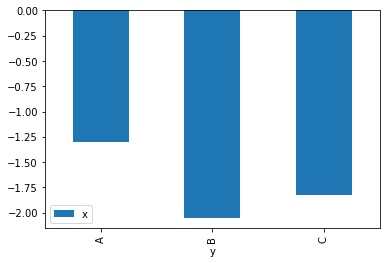

In [98]:
df.groupby('y').min().plot.bar()
pd.Series([])

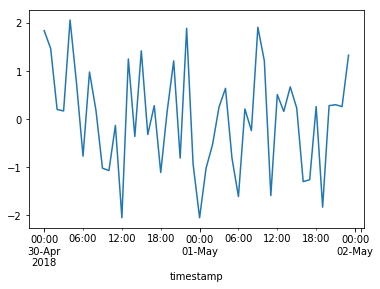

In [99]:
df.x.plot()

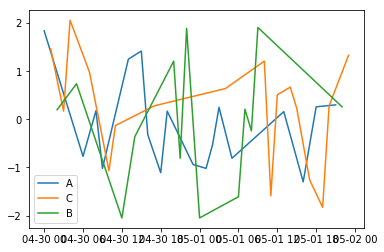

In [100]:
for group in df.y.unique():
    data = df[df.y == group]
    plt.plot(data.index, data.x, label=group)

    plt.legend()